In [22]:
import pandas as pd
import numpy as np
import os

#### Task1:  Merging 12 monts of sales dataset into single DataSet

In [24]:
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
# print(files)
all_months_data.to_csv("all_data.csv", index=False)
# print(all_months_data.head())


### Cleanup the data!

#### Dropping rows of NaN

In [25]:
all_data = pd.read_csv("all_data.csv")

In [26]:
nan_data = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how="all")


#### Removing 'Or'

In [27]:

# all_data.head(50)
# temp_data = all_data[all_data['Or']]

temp_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# temp_data['Order Date'].str[0:2]
# temp_data = temp_data.drop('Month', axis=1)
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


### Adding new columns to DataFrame

#### Task2: Add month column

In [38]:
# all_data['Month'] = all_data['Order Date'].str([0:2])
# all_data['Order Date'].isna()
if 'Month' in temp_data.columns:
    temp_data = temp_data.drop('Month', axis=1)

temp_data['Month'] = temp_data['Order Date'].str[0:2]
temp_data['Month'] = temp_data['Month'].astype('int32')

temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [39]:
new_data = temp_data

In [50]:
new_data['Sales'] = new_data['Quantity Ordered'].astype('int32') * new_data['Price Each'].astype('float')
# new_data['Price Each']
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


In [63]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


#### Q1. What is the best month for sales? How much was earned that month?

In [56]:
result = new_data.groupby('Month').sum()

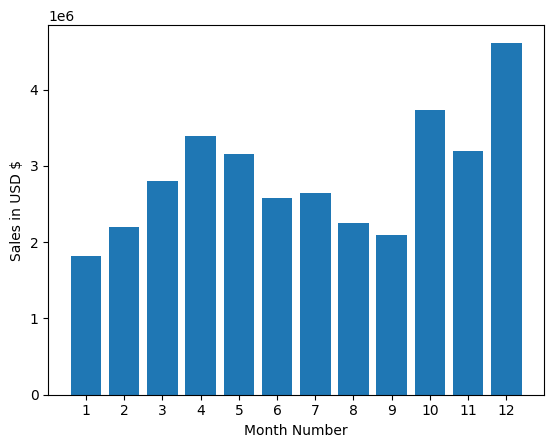

In [62]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Month Number")
plt.show()

#### Question 2: Which city has the biggest sales?